In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [111]:
dta = pd.read_csv("train.csv")

In [112]:
dta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [114]:
dta[['Sex']] = (dta[['Sex']] == 'male')*1
dta.loc[dta['Embarked'] == 'S', 'Embarked'] = 1
dta.loc[dta['Embarked'] == 'C', 'Embarked'] = 2
dta.loc[dta['Embarked'] == 'Q', 'Embarked'] = 3

In [119]:
# dta2 = dta.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1)
dta2 = dta.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
dta2.dropna(inplace= True)

In [121]:
labels = np.array(dta2['Survived'])
dta2 = dta2.drop('Survived', axis = 1)

In [122]:
dta2 = np.array(dta2)

In [123]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [124]:
rf.fit(dta2, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [125]:
print(rf.feature_importances_)

[ 0.09582175  0.24888715  0.28712741  0.04611806  0.03842633  0.25719622
  0.02642308]


In [126]:
predictions = rf.predict(dta2)

[[422   2]
 [  8 280]]


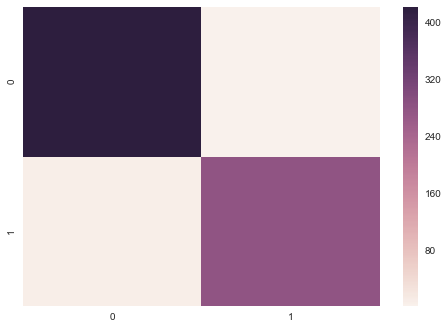

In [127]:
accuracy = 100 - np.mean(100 * (abs(predictions - labels) ))
CM = confusion_matrix(labels, predictions)
print(CM)
import seaborn
seaborn.heatmap(CM)
plt.show()

0.999443134172


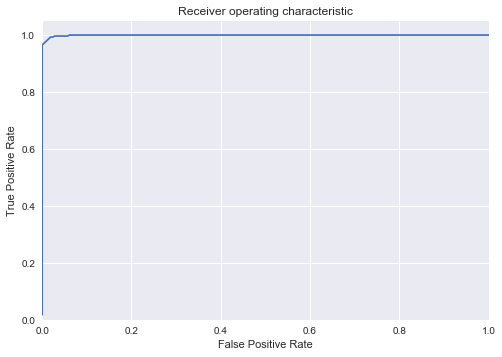

In [134]:
rf_probs = rf.predict_proba(dta2)[:, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(labels, rf_probs)
    roc_auc[i] = auc(fpr[i], tpr[i])
print roc_auc_score(labels, rf_probs)   # Calculate ROC AUC
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [128]:
accuracy

98.595505617977523

In [171]:
test = pd.read_csv("test.csv")

In [172]:
test = test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1)

In [173]:
test[['Sex']] = (test[['Sex']] == 'male')*1

In [174]:
test['Age'] = test['Age'].fillna(pd.Series(np.random.randint(70, size=len(test.index))))

In [175]:
forecast = rf.predict(test)

In [176]:
forecast

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [177]:
for item in forecast: print item

0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
1
1
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
1
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
1
1
0
1
0
1
1
0
0
1
0
0
1
1
1
1
0
0
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
0
1
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1
1
1
1
1
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
1
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
1
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
